# Simulating Springs

This notebook is dedicated to simulating the physics of springs and its application to finite element analysis.

In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.rcParams["animation.html"] = "html5"
from scipy.integrate import odeint

#magic codes
%matplotlib notebook

First we numerically integrate using sicpy.integrate.odeint

In [2]:
def singleSpring(X, t, k_1, m_1, L_1):
    dx = X[1]
    dv = (-k_1*(X[0]-L_1))/m_1
    return [dx, dv]

<IPython.core.display.Javascript object>


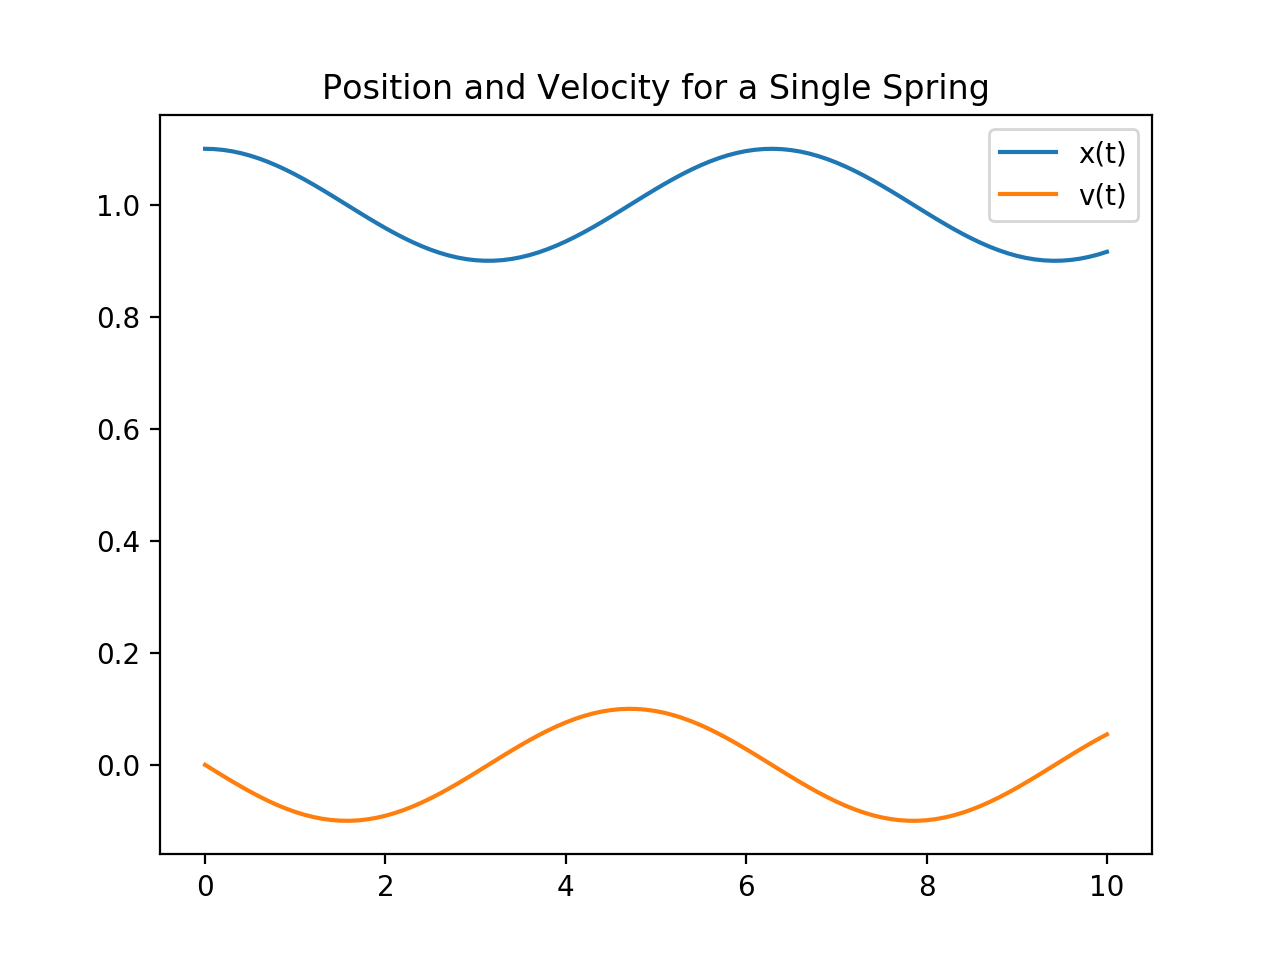

In [4]:
X0 = [1.1, 0.0]
t = np.linspace(0, 10, 101)
k_1 = 1.0
m_1 = 1.0
L_1 = 1.0
sol = odeint(singleSpring, X0, t, args=(k_1,m_1,L_1))
plt.title('Position and Velocity for a Single Spring')
plt.plot(t, sol[:,0], label='x(t)')
plt.plot(t, sol[:,1], label='v(t)')
plt.legend()
plt.show()

#plt.plot(sol[:,0], sol[:,1])
#plt.show()

Next lets move onto a spring mass system of two springs and two masses.

In [6]:
def twoSprings(X, t, k_1, m_1, L_1, k_2, m_2, L_2):
    #X[0]: x_1
    #X[1]: v_1
    #X[2]: x_2
    #X[3]: v_2
    dx_1 = X[1]
    dv_1 = (-k_1*(X[0]-L_1))/m_1 + ((X[2]-L_2)-X[0])*k_2
    dx_2 = X[3]
    dv_2 = -k_2*((X[2]-L_2)-X[0])/m_2
    return [dx_1, dv_1, dx_2, dv_2]

Now run the integration to find the positions and velocities.

<IPython.core.display.Javascript object>


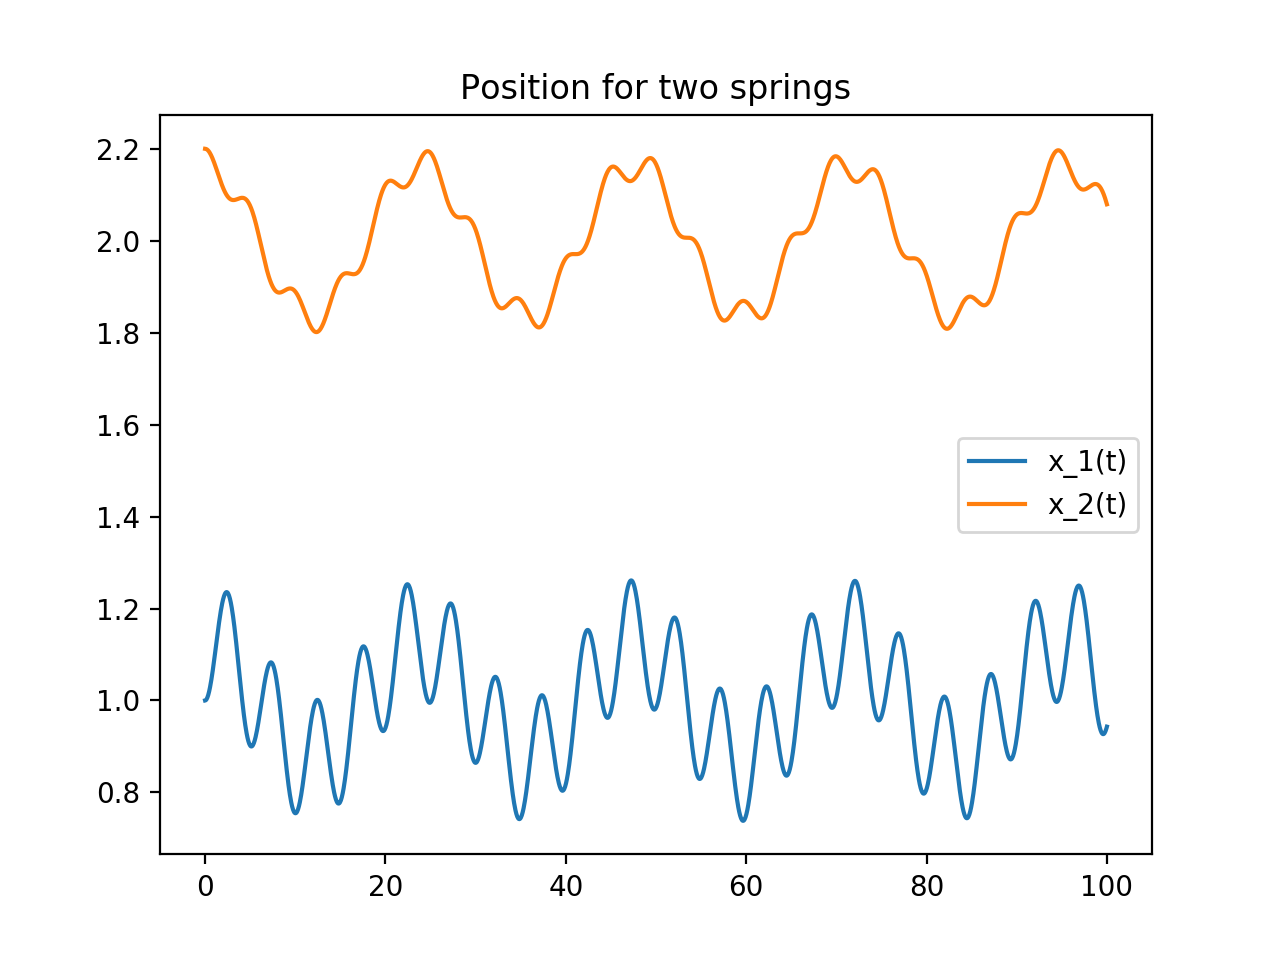

In [7]:
X0 = [1.0, 0.0,
      2.2, 0.0]
t = np.linspace(0, 100, 2000)
k_1=k_2 = 1.0
m_1=m_2 = 3.0
L_1=L_2 = 1.0
sol = odeint(twoSprings, X0, t, args=(k_1,m_1, L_1,k_2,m_2, L_2))

plt.title('Position for two springs')
plt.plot(t, sol[:,0], label='x_1(t)')
#plt.plot(t, sol[:,1], label='v_1(t)')
plt.plot(t, sol[:,2], label='x_2(t)')
#plt.plot(t, sol[:,3], label='v_2(t)')
plt.legend()
plt.show()

# Animation of a springs

Animate a single spring with no damper.

<IPython.core.display.Javascript object>


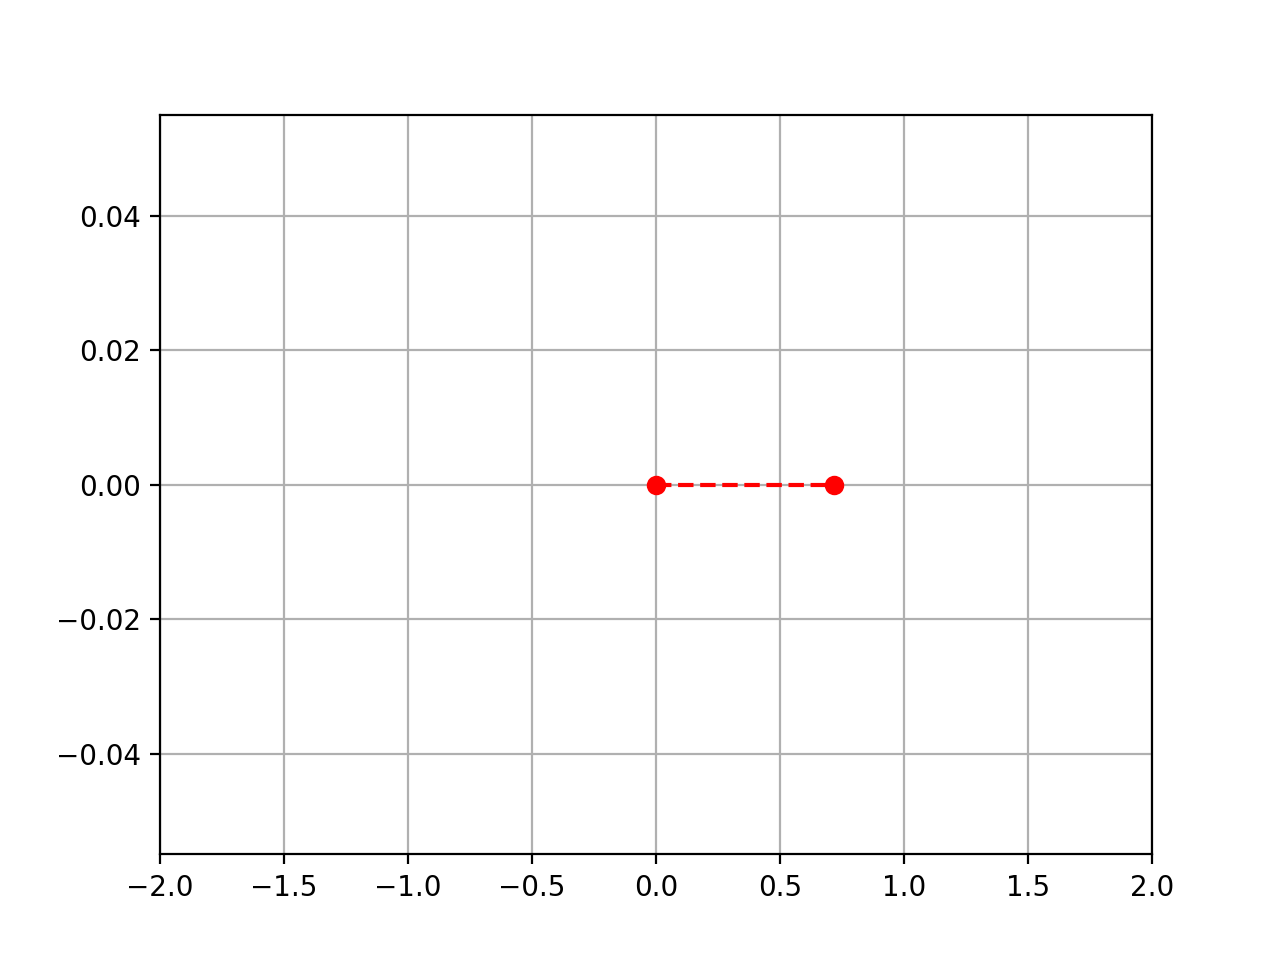

In [8]:
X0 = [1.5, 0.0]
t = np.linspace(0, 100, 2000)
k_1 = 1.0
m_1 = 1.0
L_1 = 1.0
sol = odeint(singleSpring, X0, t, args=(k_1,m_1,L_1))

fig, ax = plt.subplots()
ax.set_xlim(-2.0,2.0)

line, = ax.plot([0,sol[0][0]], [0,0], 'o--r')


def animate(x_i):
    print (x_i)
    line.set_xdata([0,x_i[0]])  # update the data
    return line,


# Init only required for blitting to give a clean slate.
def init():
    #line.set_ydata(np.ma.array(x, mask=True))
    return line,

ani = animation.FuncAnimation(fig, animate, sol, init_func=init,
                              interval=25, blit=True)

plt.grid()
plt.show()

Animate two springs with no damper.

<IPython.core.display.Javascript object>


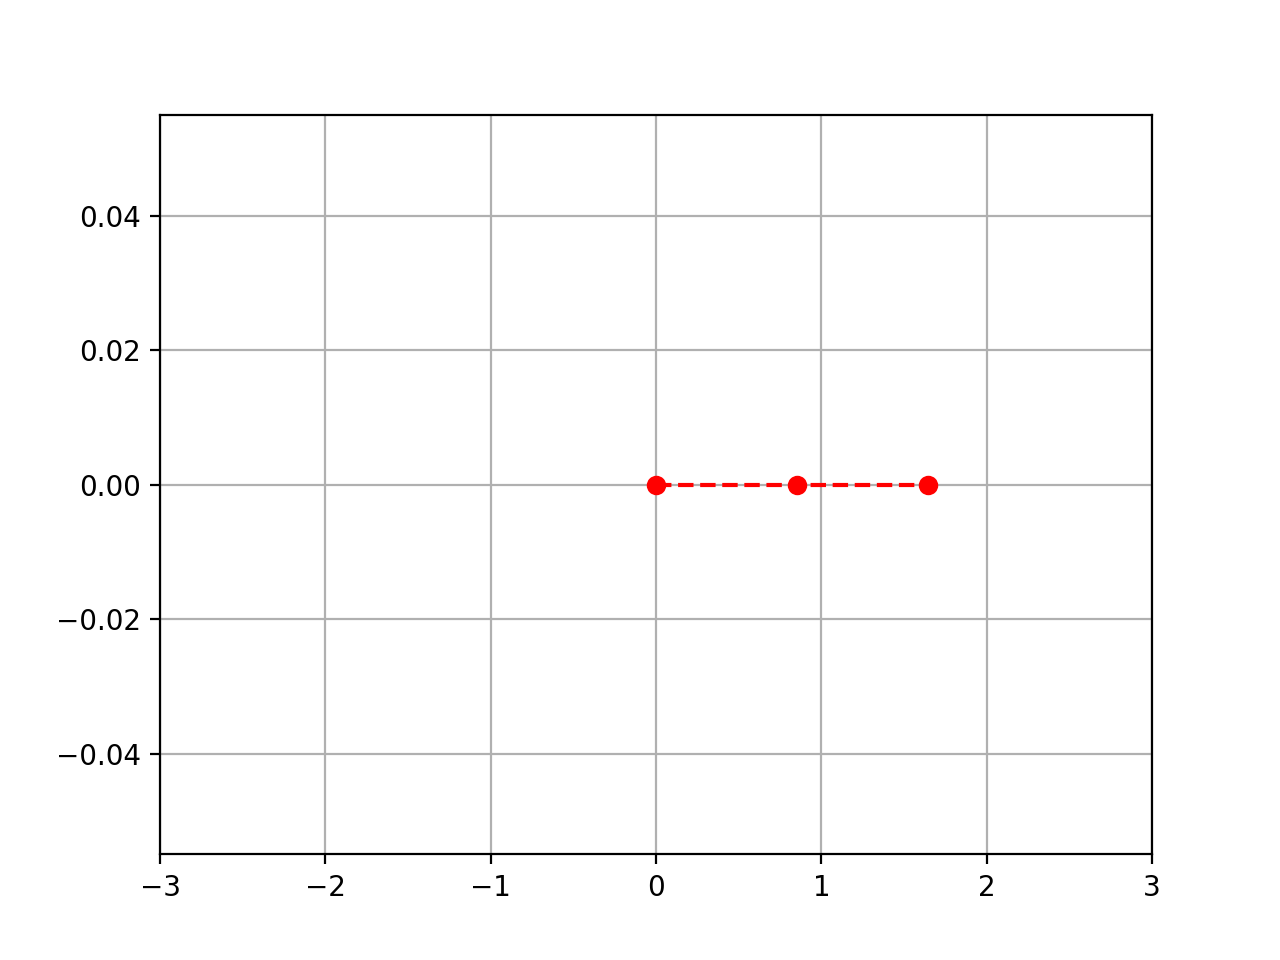

In [9]:
rez = 1000
end = 15.
refresh = int(1000/(rez/end))
X0 = [1.3, 0.0,
      2.3, 0.0]
t = np.linspace(0, end, rez)
k_1=k_2 = 10.0
m_1=m_2 = 1.0
L_1=L_2 = 1.0
sol = odeint(twoSprings, X0, t, args=(k_1,m_1,L_1,k_2,m_2,L_2))

fig, ax = plt.subplots()
ax.set_xlim(-3.0,3.0)

line, = ax.plot([0,sol[0][0],sol[0][2]], [0,0,0], 'o--r')


def animate(x_i):
    print (x_i)
    line.set_xdata([0,x_i[0],x_i[2]])  # update the data
    return line,


# Init only required for blitting to give a clean slate.
def init():
    #line.set_ydata(np.ma.array(x, mask=True))
    return line,

ani = animation.FuncAnimation(fig, animate, sol, init_func=init,
                              interval=refresh, blit=True)

plt.grid()
plt.show()

# Springs in 2 Dimensions

In [ ]:
def multiSp;ring(X, t, K):
    #X = []